Nama: [Yuswar Aditya Permana]

NIM: [A12.2019.06312]

# Pendahuluan
Anda diminta untuk mendiagnosa pasien apakah pasien tersebut status survival akhir nya hidup atau mati

<hr>

Tahapan pengerjaan adalah:
1. unduh dan load dataset ke google drive
2. buka google colab dan buat sambungan ke google drive
3. load library yang dibutuhkan
4. load dataset ke google colab
5. cek dataset, jika tidak ada nama fitur, silakan beri nama fitur sesuai deskripsi
6. cek jumlah class
7. cek apakah ada data yang hilang, jika ada, tentukan keputusan untuk mengatasi data yang hilang (dihapus atau diperbaiki)
8. hapus data duplikat
9. hapus fitur yang bernilai konstan
10. cek tipe-tipe fitur, jika ada yang kurang tepat, silakan rubah
11. ada data bernilai kategori, gunakan metode perubahan dari kategori menjadi numerik

**BUATLAH PERBANDINGAN MENGGUNAKAN DATA ORIGINAL, DATA NORMAL, DATA ORIGINAL PCA, DATA NORMAL PCA**
11. bagi menjadi data training dan data testing
12. pilih metode machine learning klasifikasi
13. siapkan parameter machine learning
14. lakukan pemodelan klasifikasi dan prediksi
15. laporkan metric hasil klasifikasi dan prediksi untuk DATA ORIGINAL, DATA NORMAL, DATA ORIGINAL PCA, DATA NORMAL PCA
16. laporkan temuan anda


catatan:
- ada beberapa coding yang sudah disediakan, anda tinggal memperbaiki bagian yang tertulis **FIX_ME**
- ada beberapa coding yang di komen menggunakan **#**, silakan anda menggunakan yang diperlukan

***Selamat Mengerjakan***

# Bagian Awal

## unduh dan load dataset ke google drive

silakan lakukan secara manual

## buka google colab dan buat sambungan ke google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


## load library yang dibutuhkan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno
# ganti FIX_ME dibawah untuk membagi menjadi training dan testing
from sklearn.model_selection import train_test_split
# ganti FIX_ME dibawah untuk memanggil fungsi PCA
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

# classifier yang dipakai, silakan anda buka tanda pagar yang anda perlukan

# from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn import svm
# from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
# ganti FIX_ME dibawah untuk memanggil fungsi standard scaler
from sklearn.preprocessing import StandardScaler
# ganti FIX_ME dibawah untuk memanggil fungsi accuracy score
from sklearn.metrics import accuracy_score
# ganti FIX_ME dibawah untuk memanggil fungsi precision score
from sklearn.metrics import precision_score
# ganti FIX_ME dibawah untuk memanggil fungsi recall score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', None)

## load dataset ke google colab

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ujian_ds_coe.csv', sep=None)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


## cek dataset, jika tidak ada nama fitur, silakan beri nama fitur sesuai deskripsi

In [ ]:
dataset.head()

,gender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,Disease,Riskgroup,Txpostrelapse,Diseasegroup,HLAmatch,HLAmismatch,Antigen,Alel,HLAgrI,Recipientage,Recipientage10,Recipientageint,Relapse,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1,1,0,3,1,1,ALL,1,0,1,0,0,-1,-1,0,9.6,0,1,0,0,1,7.20,1.33876,5.38,35,19,51,32,999,0
1,1,0,23.342466,0,1,0,-1,-1,1,0,0,0,0,ALL,0,0,1,0,0,-1,-1,0,4.0,0,0,1,1,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.394521,0,1,0,-1,-1,1,0,2,0,1,ALL,0,0,1,0,0,-1,-1,0,6.6,0,1,1,1,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
3,0,0,39.684932,1,1,0,1,2,1,1,1,1,0,AML,0,0,1,0,0,-1,-1,0,18.1,1,2,0,0,?,4.25,29.481647,0.14,50,23,29,19,53,1
4,0,1,33.358904,0,0,0,1,2,0,1,0,0,1,chronic,1,0,1,1,0,1,0,1,1.3,0,0,0,1,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0


In [ ]:
# buka kolom ini jika anda merasa perlu mengganti kolom
#dataset.columns = ['fitur_1','fitur_dll']

In [ ]:
dataset.head()

,gender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,Disease,Riskgroup,Txpostrelapse,Diseasegroup,HLAmatch,HLAmismatch,Antigen,Alel,HLAgrI,Recipientage,Recipientage10,Recipientageint,Relapse,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1,1,0,3,1,1,ALL,1,0,1,0,0,-1,-1,0,9.6,0,1,0,0,1,7.20,1.33876,5.38,35,19,51,32,999,0
1,1,0,23.342466,0,1,0,-1,-1,1,0,0,0,0,ALL,0,0,1,0,0,-1,-1,0,4.0,0,0,1,1,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.394521,0,1,0,-1,-1,1,0,2,0,1,ALL,0,0,1,0,0,-1,-1,0,6.6,0,1,1,1,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
3,0,0,39.684932,1,1,0,1,2,1,1,1,1,0,AML,0,0,1,0,0,-1,-1,0,18.1,1,2,0,0,?,4.25,29.481647,0.14,50,23,29,19,53,1
4,0,1,33.358904,0,0,0,1,2,0,1,0,0,1,chronic,1,0,1,1,0,1,0,1,1.3,0,0,0,1,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0


## cek jumlah class

In [ ]:
dataset['Disease'].unique()

array(['ALL', 'AML', 'chronic', 'nonmalignant', 'lymphoma'], dtype=object)

In [ ]:
dataset['Disease'].value_counts()

ALL             68
chronic         45
AML             33
nonmalignant    32
lymphoma         9
Name: Disease, dtype: int64

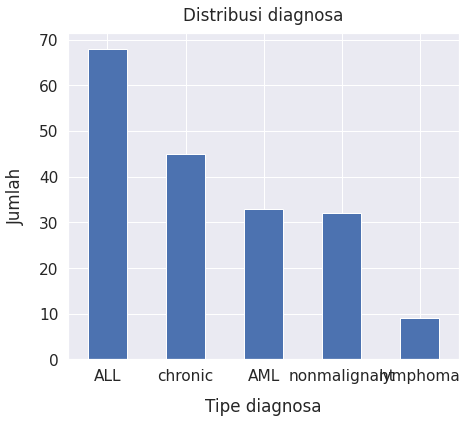

In [ ]:
sns.set(font_scale=1.4)
dataset['Disease'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Tipe diagnosa", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi diagnosa", y=1.02);

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                187 non-null    int64  
 1   Stemcellsource        187 non-null    int64  
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    int64  
 4   IIIV                  187 non-null    int64  
 5   Gendermatch           187 non-null    int64  
 6   DonorABO              187 non-null    int64  
 7   RecipientABO          187 non-null    object 
 8   RecipientRh           187 non-null    object 
 9   ABOmatch              187 non-null    object 
 10  CMVstatus             187 non-null    object 
 11  DonorCMV              187 non-null    object 
 12  RecipientCMV          187 non-null    object 
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    int64  
 15  Txpostrelapse         1

In [ ]:
dataset.describe()

,gender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,Riskgroup,Txpostrelapse,Diseasegroup,HLAmatch,HLAmismatch,HLAgrI,Recipientage,Recipientage10,Recipientageint,Relapse,aGvHDIIIIV,CD34kgx10d6,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.598930,0.775401,33.472068,0.443850,0.598930,0.171123,0.390374,0.368984,0.122995,0.828877,0.673797,0.149733,1.219251,9.931551,0.470588,1.224599,0.149733,0.786096,11.891781,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,0.491431,0.418438,8.271826,0.498171,0.491431,0.377627,0.837632,0.483825,0.329313,0.377627,0.793460,0.357767,1.719607,5.305639,0.500474,0.824904,0.357767,0.411161,9.914386,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,0.000000,0.000000,18.646575,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.790000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,0.000000,1.000000,27.039726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.050000,0.000000,0.500000,0.000000,1.000000,5.350000,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,1.000000,1.000000,33.550685,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.600000,0.000000,1.000000,0.000000,1.000000,9.720000,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,1.000000,1.000000,40.117809,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,14.050000,1.000000,2.000000,0.000000,1.000000,15.415000,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,1.000000,1.000000,55.553425,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,7.000000,20.200000,1.000000,2.000000,1.000000,1.000000,57.780000,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


## cek apakah ada data yang hilang, jika ada, tentukan keputusan untuk mengatasi data yang hilang (dihapus atau diperbaiki)

In [ ]:
dataset.replace("?", np.nan, inplace= True)

In [ ]:
dataset.head()

,gender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,Disease,Riskgroup,Txpostrelapse,Diseasegroup,HLAmatch,HLAmismatch,Antigen,Alel,HLAgrI,Recipientage,Recipientage10,Recipientageint,Relapse,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1,1,0,3,1,1,ALL,1,0,1,0,0,-1,-1,0,9.6,0,1,0,0,1,7.20,1.33876,5.38,35,19,51,32,999,0
1,1,0,23.342466,0,1,0,-1,-1,1,0,0,0,0,ALL,0,0,1,0,0,-1,-1,0,4.0,0,0,1,1,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.394521,0,1,0,-1,-1,1,0,2,0,1,ALL,0,0,1,0,0,-1,-1,0,6.6,0,1,1,1,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
3,0,0,39.684932,1,1,0,1,2,1,1,1,1,0,AML,0,0,1,0,0,-1,-1,0,18.1,1,2,0,0,NaN,4.25,29.481647,0.14,50,23,29,19,53,1
4,0,1,33.358904,0,0,0,1,2,0,1,0,0,1,chronic,1,0,1,1,0,1,0,1,1.3,0,0,0,1,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0


In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['RecipientABO', 'RecipientRh', 'ABOmatch', 'CMVstatus', 'DonorCMV',
       'RecipientCMV', 'Antigen', 'Alel', 'extcGvHD', 'CD3dCD34',
       'CD3dkgx10d8', 'Rbodymass'],
      dtype='object')

In [ ]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

RecipientABO     0.534759
RecipientRh      1.069519
ABOmatch         0.534759
CMVstatus        8.556150
DonorCMV         1.069519
RecipientCMV     7.486631
Antigen          0.534759
Alel             0.534759
extcGvHD        16.577540
CD3dCD34         2.673797
CD3dkgx10d8      2.673797
Rbodymass        1.069519
dtype: float64

In [ ]:
# BUKA JIKA DIPERLUKAN
# fitur 1
median_value=dataset['RecipientABO'].median()
dataset['RecipientABO']=dataset['RecipientABO'].fillna(median_value)

# fitur 2
median_value=dataset['RecipientRh'].median()
dataset['RecipientRh']=dataset['RecipientRh'].fillna(median_value)

# fitur 3
median_value=dataset['ABOmatch'].median()
dataset['ABOmatch']=dataset['ABOmatch'].fillna(median_value)

# fitur 4
median_value=dataset['CMVstatus'].median()
dataset['CMVstatus']=dataset['CMVstatus'].fillna(median_value)

# fitur 5
median_value=dataset['DonorCMV'].median()
dataset['DonorCMV']=dataset['DonorCMV'].fillna(median_value)

# fitur 6
median_value=dataset['RecipientCMV'].median()
dataset['RecipientCMV']=dataset['RecipientCMV'].fillna(median_value)

# fitur 7
median_value=dataset['Antigen'].median()
dataset['Antigen']=dataset['Antigen'].fillna(median_value)

# fitur 8
median_value=dataset['Alel'].median()
dataset['Alel']=dataset['Alel'].fillna(median_value)

# fitur 9
median_value=dataset['extcGvHD'].median()
dataset['extcGvHD']=dataset['extcGvHD'].fillna(median_value)

# fitur 10
median_value=dataset['CD3dCD34'].median()
dataset['CD3dCD34']=dataset['CD3dCD34'].fillna(median_value)

# fitur 11
median_value=dataset['CD3dkgx10d8'].median()
dataset['CD3dkgx10d8']=dataset['CD3dkgx10d8'].fillna(median_value)

# fitur 12
median_value=dataset['Rbodymass'].median()
dataset['Rbodymass']=dataset['Rbodymass'].fillna(median_value)

## hapus data duplikat

In [ ]:
dataset.shape

(187, 37)

In [ ]:
dataset.drop_duplicates()

,gender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,Disease,Riskgroup,Txpostrelapse,Diseasegroup,HLAmatch,HLAmismatch,Antigen,Alel,HLAgrI,Recipientage,Recipientage10,Recipientageint,Relapse,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1,1,0,3,1,1,ALL,1,0,1,0,0,-1,-1,0,9.6,0,1,0,0,1,7.20,1.33876,5.38,35,19,51,32,999,0
1,1,0,23.342466,0,1,0,-1,-1,1,0,0,0,0,ALL,0,0,1,0,0,-1,-1,0,4.0,0,0,1,1,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.394521,0,1,0,-1,-1,1,0,2,0,1,ALL,0,0,1,0,0,-1,-1,0,6.6,0,1,1,1,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
3,0,0,39.684932,1,1,0,1,2,1,1,1,1,0,AML,0,0,1,0,0,-1,-1,0,18.1,1,2,0,0,1.0,4.25,29.481647,0.14,50,23,29,19,53,1
4,0,1,33.358904,0,0,0,1,2,0,1,0,0,1,chronic,1,0,1,1,0,1,0,1,1.3,0,0,0,1,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,37.575342,1,1,0,1,1,0,0,3,1,1,lymphoma,1,1,1,0,0,-1,-1,0,12.9,1,2,1,0,1,11.08,2.52275,4.39,44,15,22,16,385,1
183,0,1,22.895890,0,0,0,1,0,1,1,2,0,1,AML,1,0,1,0,0,-1,-1,0,13.9,1,2,0,1,1,4.64,1.038858,4.47,44.5,12,30,1000000,634,1
184,0,1,27.347945,0,1,0,1,-1,1,1,3,1,1,nonmalignant,0,0,0,0,0,-1,-1,0,10.4,1,2,0,1,1,7.73,1.635559,4.73,33,16,16,1000000,1895,0
185,1,1,27.780822,0,1,0,1,0,1,1,0,0,0,chronic,0,0,1,1,0,1,0,1,8.0,0,1,0,0,0,15.41,8.07777,1.91,24,13,14,54,382,1


In [ ]:
dataset.shape

(187, 37)

## hapus fitur yang bernilai konstan

In [ ]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [ ]:
dataset.shape

(187, 37)

## Konversi Kategori menjadi angka numerik

In [ ]:
disease_map={"ALL":0, "AML":1, "chronic":2, "nonmalignant":3, "lymphoma":4}
dataset['Disease'] = dataset['Disease'].map(disease_map)

## cek tipe-tipe fitur, jika ada yang kurang tepat, silakan rubah

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                187 non-null    int64  
 1   Stemcellsource        187 non-null    int64  
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    int64  
 4   IIIV                  187 non-null    int64  
 5   Gendermatch           187 non-null    int64  
 6   DonorABO              187 non-null    int64  
 7   RecipientABO          187 non-null    object 
 8   RecipientRh           187 non-null    object 
 9   ABOmatch              187 non-null    object 
 10  CMVstatus             187 non-null    object 
 11  DonorCMV              187 non-null    object 
 12  RecipientCMV          187 non-null    object 
 13  Disease               187 non-null    int64  
 14  Riskgroup             187 non-null    int64  
 15  Txpostrelapse         1

In [ ]:
# tipe yang tersedia: int, float, object
# dataset["FITUR_YANG_AKAN_DIUBAH"] = dataset["FITUR_YANG_AKAN_DIUBAH"].astype(TIPE)
dataset["RecipientABO"] = dataset["RecipientABO"].astype(int)
dataset["RecipientRh"]= dataset["RecipientRh"].astype(int)
dataset["ABOmatch"] = dataset["ABOmatch"].astype(int)
dataset["CMVstatus"] = dataset["CMVstatus"].astype(int)
dataset["DonorCMV"] = dataset["DonorCMV"].astype(int)
dataset["RecipientCMV"] = dataset["RecipientCMV"].astype(int)
dataset["Antigen"] = dataset["Antigen"].astype(int)
dataset["Alel"] = dataset["Alel"].astype(int)
dataset["extcGvHD"] = dataset["extcGvHD"].astype(int)
dataset["CD3dCD34"] = dataset["CD3dCD34"].astype(float)
dataset["CD3dkgx10d8"] = dataset["CD3dkgx10d8"].astype(float)
dataset["Rbodymass"] = dataset["Rbodymass"].astype(float)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                187 non-null    int64  
 1   Stemcellsource        187 non-null    int64  
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    int64  
 4   IIIV                  187 non-null    int64  
 5   Gendermatch           187 non-null    int64  
 6   DonorABO              187 non-null    int64  
 7   RecipientABO          187 non-null    int64  
 8   RecipientRh           187 non-null    int64  
 9   ABOmatch              187 non-null    int64  
 10  CMVstatus             187 non-null    int64  
 11  DonorCMV              187 non-null    int64  
 12  RecipientCMV          187 non-null    int64  
 13  Disease               187 non-null    int64  
 14  Riskgroup             187 non-null    int64  
 15  Txpostrelapse         1

# BUATLAH PERBANDINGAN MENGGUNAKAN DATA ORIGINAL, DATA NORMAL, DATA ORIGINAL PCA, DATA NORMAL PCA

In [ ]:
X = dataset.iloc[:,0:36]
y = dataset['Disease']

In [ ]:
X

,gender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,Disease,Riskgroup,Txpostrelapse,Diseasegroup,HLAmatch,HLAmismatch,Antigen,Alel,HLAgrI,Recipientage,Recipientage10,Recipientageint,Relapse,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time
0,1,1,22.830137,0,1,0,1,1,1,0,3,1,1,0,1,0,1,0,0,-1,-1,0,9.6,0,1,0,0,1,7.20,1.338760,5.38,35.0,19,51,32,999
1,1,0,23.342466,0,1,0,-1,-1,1,0,0,0,0,0,0,0,1,0,0,-1,-1,0,4.0,0,0,1,1,1,4.50,11.078295,0.41,20.6,16,37,1000000,163
2,1,0,26.394521,0,1,0,-1,-1,1,0,2,0,1,0,0,0,1,0,0,-1,-1,0,6.6,0,1,1,1,1,7.94,19.013230,0.42,23.4,23,20,1000000,435
3,0,0,39.684932,1,1,0,1,2,1,1,1,1,0,1,0,0,1,0,0,-1,-1,0,18.1,1,2,0,0,1,4.25,29.481647,0.14,50.0,23,29,19,53
4,0,1,33.358904,0,0,0,1,2,0,1,0,0,1,2,1,0,1,1,0,1,0,1,1.3,0,0,0,1,1,51.85,3.972255,13.05,9.0,14,14,1000000,2043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,37.575342,1,1,0,1,1,0,0,3,1,1,4,1,1,1,0,0,-1,-1,0,12.9,1,2,1,0,1,11.08,2.522750,4.39,44.0,15,22,16,385
183,0,1,22.895890,0,0,0,1,0,1,1,2,0,1,1,1,0,1,0,0,-1,-1,0,13.9,1,2,0,1,1,4.64,1.038858,4.47,44.5,12,30,1000000,634
184,0,1,27.347945,0,1,0,1,-1,1,1,3,1,1,3,0,0,0,0,0,-1,-1,0,10.4,1,2,0,1,1,7.73,1.635559,4.73,33.0,16,16,1000000,1895
185,1,1,27.780822,0,1,0,1,0,1,1,0,0,0,2,0,0,1,1,0,1,0,1,8.0,0,1,0,0,0,15.41,8.077770,1.91,24.0,13,14,54,382


In [ ]:
y

0      0
1      0
2      0
3      1
4      2
      ..
182    4
183    1
184    3
185    2
186    3
Name: Disease, Length: 187, dtype: int64

## perlakuan data original

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=2022)

## perlakuan data normal

In [ ]:
X_norm = StandardScaler().fit_transform(X)

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.3, random_state=2022)

## perlakuan data original PCA

In [ ]:
pca = PCA(random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of lungs_pca:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of lungs_pca:               0              1             2           3          4   \
0  768917.587436 -130002.435590  45257.350176  160.740362   5.900519   
1 -228758.757187  -84077.337375  -4425.029130 -915.205118 -16.780177   
2 -228760.076096  -84091.013008  -4412.504084 -643.224318 -13.021314   
3  768929.378409 -130021.362698  45269.294732 -785.316117  22.157084   
4 -228760.628111  -84101.207047  -4418.610411  964.848065 -35.593559   

          5          6          7         8         9         10        11  \
0  -4.839116 -10.482752   4.051131  1.507901  0.067607 -2.154012 -0.642547   
1   8.995011 -15.127951   2.278362 -2.625601 -2.905787 -1.070187 -1.804535   
2  15.225644  -9.305269   5.487492 -2.064891 -0.643560 -1.095060 -1.460177   
3  24.014201   4.147690   3.977590  0.521428  4.899667 -1.661568  0.150310   
4 -10.043548  23.445418  16.863708  0.161921 -0.897583 -0.439990 -0.253102   

         12        13        14        15        16        17        18  \
0 -

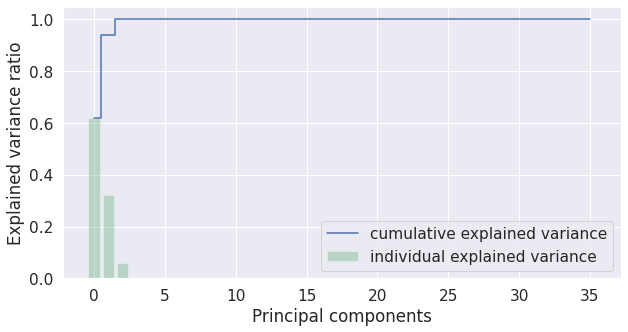

Cumulative explained ratio: [0.61777157 0.94119512 0.99999776 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

In [ ]:
pca = PCA(n_components=2, random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(data=ori_pca_array, columns = ['PC1', 'PC2'])


In [ ]:
ori_pca

,PC1,PC2
0,768917.587436,-130002.435590
1,-228758.757187,-84077.337375
2,-228760.076096,-84091.013008
3,768929.378409,-130021.362698
4,-228760.628111,-84101.207047
...,...,...
182,768932.096124,-130031.151178
183,-228759.194492,-84085.704420
184,-228760.525553,-84098.502737
185,768893.761444,-130037.586488


In [ ]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=0.3, random_state=2022)

## perlakuan data normal PCA

In [ ]:
pca = PCA(random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of lungs_pca:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of lungs_pca:          0         1         2         3         4         5         6   \
0 -0.156032 -1.398994  1.645598  2.181367 -1.966935 -0.367206 -2.151349   
1 -0.862440 -1.757293  3.024905 -0.654249  2.785844  1.019330  0.474449   
2 -1.567162 -1.530636  1.654486  0.581866  2.833965  0.412077 -0.867891   
3 -2.588657  1.339827  2.522694  1.358730  0.310866 -2.307122  0.193517   
4  3.803116 -2.683598 -1.406974 -1.887154 -0.504017  0.121222 -0.536331   

         7         8         9         10        11        12        13  \
0  1.225204  0.515090 -0.379699 -0.077003 -0.483479 -0.296892  0.754996   
1  1.557516  1.255928  1.581469  0.051538 -0.019206 -1.590269  0.670444   
2  1.748116  1.179684  0.434341 -0.097886 -0.377930 -1.013210  0.177569   
3 -0.520081 -2.080938 -0.549987  2.483361  0.482387 -1.145566 -0.453162   
4 -0.289609 -0.238909  0.606894  2.014001 -0.301967  2.653126 -2.517739   

         14        15        16        17        18        19        20  \
0 -

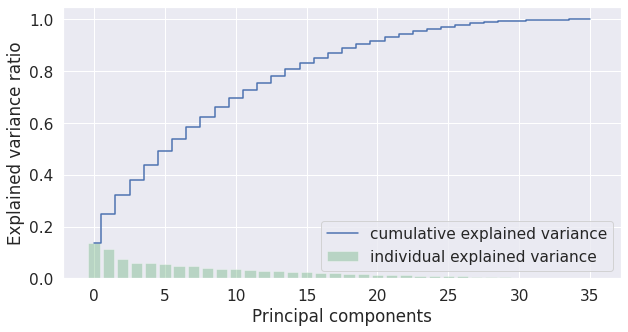

Cumulative explained ratio: [0.13552411 0.24804238 0.32078272 0.37972274 0.43690787 0.49059033
 0.53949601 0.58538701 0.62350582 0.66130245 0.69531407 0.72605812
 0.75517708 0.78203279 0.80822366 0.83253068 0.85293979 0.87208998
 0.88844242 0.90343577 0.91803544 0.93157027 0.94326067 0.95346355
 0.96242141 0.97072374 0.97850236 0.98486955 0.98943483 0.99321403
 0.99587497 0.99743153 0.99849525 0.99923388 0.99978085 1.        ]


In [ ]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

In [ ]:
pca = PCA(n_components=20, random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])


In [ ]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=0.3, random_state=2022)

## pilih model - siapkan parameter - lakukan pemodelan

### pilih model

In [ ]:
# untuk decision tree
# parameters_dt = {
#                 "model__max_depth": np.arange(1,21),
#                 "model__min_samples_leaf": np.arange(1,101,2),
#                 "model__min_samples_split": np.arange(2,11),
#                 "model__criterion": ['gini','entropy'],
#                 "model__random_state": [2022]
# }

In [ ]:
# untuk SVM
#parameters_dt = {
#                "model__C": np.arange(0.01,1,2),
#                "model__gamma": ['scale'],
#                "model__kernel": ['rbf','linear'],
#                "model__random_state": [2022]
#}

In [ ]:
# untuk KNN
#parameters_dt = {
#                "model__n_neighbors": np.arange(5,31,5),
#                "model__weights": ['uniform','distance']
#}

In [ ]:
# untuk naive bayes
parameters_dt = {
                "model__var_smoothing":  (0, 1, 1e-2, 1e-3),
}

### siapkan parameter ke pipeline

In [ ]:
# silakan buka sesuai pilihan anda
classifier_dt_pipeline = Pipeline([
                          #('model',DecisionTreeClassifier()),
                          #('model',svm.SVC(decision_function_shape='ovo')),
                          #('model',KNeighborsClassifier())
                          ('model', GaussianNB()),
                          ])

### pemodelan data original

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=3, estimator=Pipeline(steps=[('model', GaussianNB())]),
             n_jobs=-1,
             param_grid={'model__var_smoothing': (0, 1, 0.01, 0.001)})

In [ ]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model', GaussianNB(var_smoothing=0))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__var_smoothing: 0


### pemodelan data original PCA

In [ ]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_pca_classifier_dt.fit(X_train_pca,Y_train_pca.ravel())

GridSearchCV(cv=3, estimator=Pipeline(steps=[('model', GaussianNB())]),
             n_jobs=-1,
             param_grid={'model__var_smoothing': (0, 1, 0.01, 0.001)})

In [ ]:
ori_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model', GaussianNB(var_smoothing=1))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__var_smoothing: 1


### pemodelan data normal

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=3, estimator=Pipeline(steps=[('model', GaussianNB())]),
             n_jobs=-1,
             param_grid={'model__var_smoothing': (0, 1, 0.01, 0.001)})

In [ ]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model', GaussianNB(var_smoothing=0.001))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__var_smoothing: 0.001


### pemodelan data normal PCA

In [ ]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())

GridSearchCV(cv=3, estimator=Pipeline(steps=[('model', GaussianNB())]),
             n_jobs=-1,
             param_grid={'model__var_smoothing': (0, 1, 0.01, 0.001)})

In [ ]:
norm_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model', GaussianNB(var_smoothing=0.01))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))

model__var_smoothing: 0.01


## Evaluasi

### evaluasi data original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.36923076923076925
Precision pada training set:  0.36923076923076925
Recall pada training set:  0.36923076923076925
Akurasi pada test set:  0.3508771929824561
Precision pada test set:  0.3508771929824561
Recall pada test set:  0.3508771929824561


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:489: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:490: RuntimeWarning: divide by zero encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:490: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:490: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:489: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.7/dist-packages

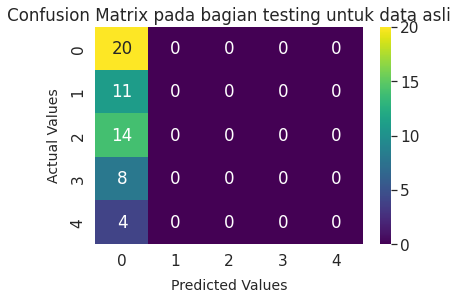

In [ ]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### evaluasi data original PCA

In [ ]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)

ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)

ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)

ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)

ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)

ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)

ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)

ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.36923076923076925
Precision pada training set:  0.36923076923076925
Recall pada training set:  0.36923076923076925
Akurasi pada test set:  0.3508771929824561
Precision pada test set:  0.3508771929824561
Recall pada test set:  0.3508771929824561


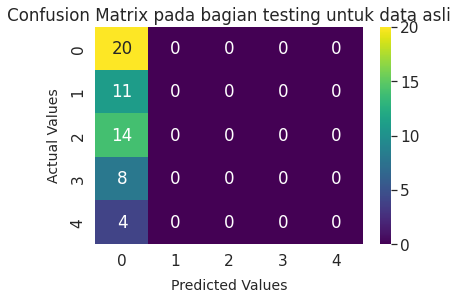

In [ ]:
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### evaluasi data normal

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  1.0
Precision pada training set:  1.0
Recall pada training set:  1.0
Akurasi pada test set:  0.8771929824561403
Precision pada test set:  0.8771929824561403
Recall pada test set:  0.8771929824561403


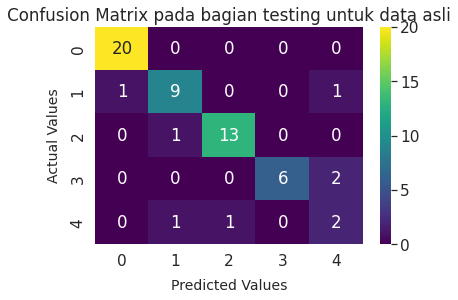

In [ ]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### evaluasi data normal PCA

In [ ]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)

norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)

norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)

norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)

norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)

norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)

norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)

norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  0.9076923076923077
Precision pada training set:  0.9076923076923077
Recall pada training set:  0.9076923076923077
Akurasi pada test set:  0.5789473684210527
Precision pada test set:  0.5789473684210527
Recall pada test set:  0.5789473684210527


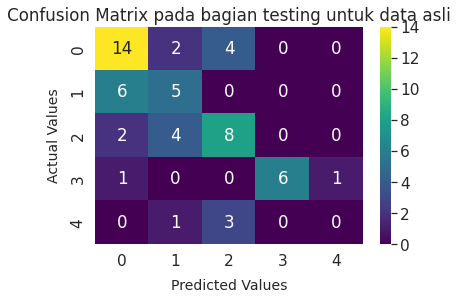

In [ ]:
sns.heatmap(confusion_matrix(Y_test_norm_pca,norm_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

## Pelaporan

In [ ]:
models = [
          ('Naive Bayes Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Naive Bayes Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
          ('Naive Bayes PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),
          ('Naive Bayes PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Data Original,0.369231,0.350877
1,Naive Bayes Data Normalisasi,1.000000,0.877193
2,Naive Bayes PCA Data Original,0.369231,0.350877
3,Naive Bayes PCA Data Normalisasi,0.907692,0.578947


In [ ]:
models_comparison = [
                        ('Naive Bayes Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Naive Bayes Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
                        ('Naive Bayes PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
                        ('Naive Bayes PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
                    ]

In [ ]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Data Original,0.350877,0.350877,0.350877
1,Naive Bayes Data Normalisasi,0.877193,0.877193,0.877193
2,Naive Bayes PCA Data Original,0.350877,0.350877,0.350877
3,Naive Bayes PCA Data Normalisasi,0.578947,0.578947,0.578947


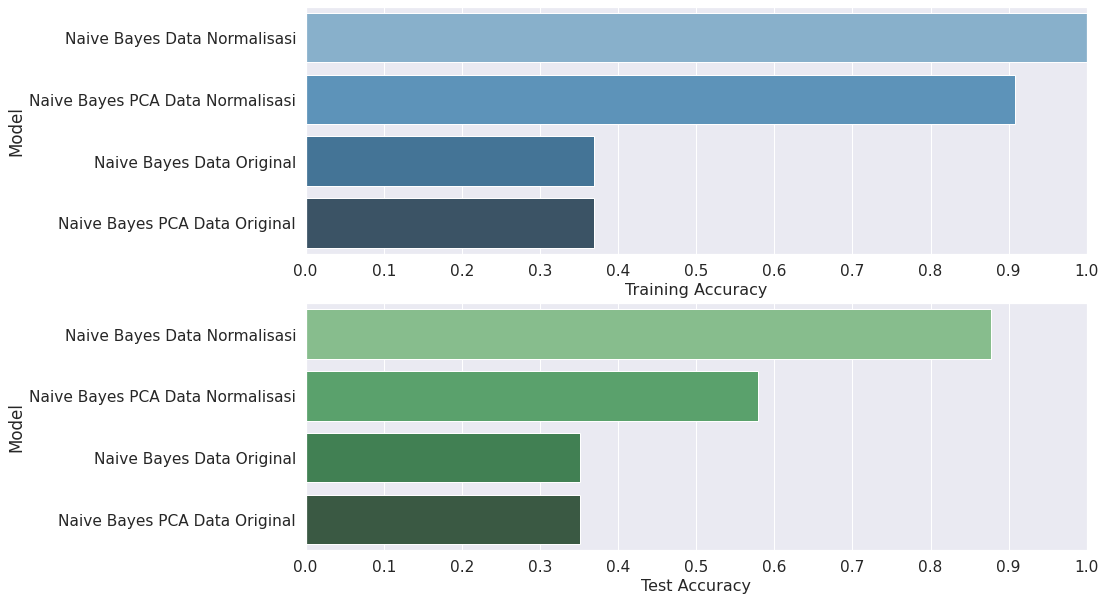

In [ ]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

Kesimpulan: Bahwa data yang di normalisasi mendapatakan training dan testing yang optimal dengan metode Naive Bayes
